Restarted .venv (Python 3.11.3)

## Multi Touch Attribution

In [1]:
#Importing relevant libraries
import pandas as pd
from marketing_attribution_models import MAM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processed/pcb_subset.csv")

In [3]:
df.head()

,customer_id,path,conversion
0,10028,Search Ads > Display Ads,1
1,10045,Search Ads > Display Ads,1
2,10062,Social Media > Direct Traffic > Email,1
3,10068,Search Ads > Social Media > Social Media > Sea...,1
4,10095,Display Ads > Email > Referral > Display Ads >...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  2847 non-null   int64 
 1   path         2847 non-null   object
 2   conversion   2847 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.9+ KB


In [5]:
# Copy the data frame
df_copy = df.copy()

# MAM initialisieren ohne Zeit-Grouping
attributions = MAM(
    df_copy,
    channels_colname="path",                       # deine Journey-Strings
    journey_with_conv_colname="conversion",        # 0/1-Flag
    group_channels=False,                          # KEINE Zeit-Sortierung, voraggregierte „path“-Strings
    create_journey_id_based_on_conversion=True
)

In [6]:
markov_results = attributions.attribution_markov()
print(f"Anzahl Rückgabewerte: {len(markov_results)}")
print(f"Typen: {[type(x) for x in markov_results]}")

print("\n" + "="*50)
print("RÜCKGABEWERT 1 (Series):")
print("="*50)
print(markov_results[0])
print(f"Shape: {markov_results[0].shape}")

print("\n" + "="*50)
print("RÜCKGABEWERT 2 (DataFrame):")
print("="*50)
print(markov_results[1])
print(f"Shape: {markov_results[1].shape}")
print(f"Spalten: {list(markov_results[1].columns)}")

print("\n" + "="*50)
print("RÜCKGABEWERT 3 (DataFrame):")
print("="*50)
print(markov_results[2])
print(f"Shape: {markov_results[2].shape}")
print(f"Spalten: {list(markov_results[2].columns)}")

print("\n" + "="*50)
print("RÜCKGABEWERT 4 (DataFrame):")
print("="*50)
print(markov_results[3])
print(f"Shape: {markov_results[3].shape}")
print(f"Spalten: {list(markov_results[3].columns)}")

Anzahl Rückgabewerte: 4
Typen: [<class 'pandas.core.series.Series'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]

RÜCKGABEWERT 1 (Series):
0               [0.49170517172239614, 0.5082948282776037]
1               [0.49170517172239614, 0.5082948282776037]
2       [0.3300698236629022, 0.3410146548775041, 0.328...
3       [0.19858588441056124, 0.20094274372629248, 0.2...
4       [0.1682363336544101, 0.16410105766484698, 0.16...
                              ...                        
2842    [0.20315938881746923, 0.19886114490720525, 0.1...
2843    [0.19644402254428273, 0.2036702015563494, 0.20...
2844             [0.5084493918262764, 0.4915506081737236]
2845    [0.16602415887142702, 0.1661268645462005, 0.16...
2846    [0.1692698472717051, 0.16364400805559187, 0.16...
Name: path, Length: 2847, dtype: object
Shape: (2847,)

RÜCKGABEWERT 2 (DataFrame):
         channels  attribution_markov_algorithmic
0        Referra

c:\Users\Maria\Desktop\ds_projects\attribution\.venv\Lib\site-packages\marketing_attribution_models\MAM.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_frame["channels_agg"] = self.channels.apply(self.sep.join)
c:\Users\Maria\Desktop\ds_projects\attribution\.venv\Lib\site-packages\marketing_attribution_models\MAM.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_frame["converted_agg"] = self.journey_with_conv


In [7]:
# Different Attribution Models
first_df, _  = attributions.attribution_first_click()
last_df, _   = attributions.attribution_last_click()
linear_df, _ = attributions.attribution_linear()
position_decay_df, _ = attributions.attribution_position_decay()
position_based_df, _ = attributions.attribution_position_based(list_positions_first_middle_last=[0.3, 0.3, 0.4])
markov_df, *_ = attributions.attribution_markov()

In [8]:
attributions.data_frame

,channels_agg,converted_agg,conversion_value,time_till_conv_agg,attribution_markov_algorithmic,attribution_first_click_heuristic,attribution_last_click_heuristic,attribution_linear_heuristic,attribution_position_decay_heuristic,attribution_position_based_0.3_0.3_0.4_heuristic
0,Search Ads > Display Ads,1,1,24 > 0,0.49170517172239614 > 0.5082948282776037,1 > 0,0 > 1,0.5 > 0.5,0.3333333333333333 > 0.6666666666666666,0.44999999999999996 > 0.55
1,Search Ads > Display Ads,1,1,24 > 0,0.49170517172239614 > 0.5082948282776037,1 > 0,0 > 1,0.5 > 0.5,0.3333333333333333 > 0.6666666666666666,0.44999999999999996 > 0.55
2,Social Media > Direct Traffic > Email,1,1,48 > 24 > 0,0.3300698236629022 > 0.3410146548775041 > 0.32...,1 > 0 > 0,0 > 0 > 1,0.3333333333333333 > 0.3333333333333333 > 0.33...,0.16666666666666666 > 0.3333333333333333 > 0.5,0.3 > 0.3 > 0.4
3,Search Ads > Social Media > Social Media > Sea...,1,1,96 > 72 > 48 > 24 > 0,0.19858588441056124 > 0.20094274372629248 > 0....,1 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 1,0.2 > 0.2 > 0.2 > 0.2 > 0.2,0.06666666666666667 > 0.13333333333333333 > 0....,0.3 > 0.09999999999999999 > 0.0999999999999999...
4,Display Ads > Email > Referral > Display Ads >...,1,1,120 > 96 > 72 > 48 > 24 > 0,0.1682363336544101 > 0.16410105766484698 > 0.1...,1 > 0 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 0 > 1,0.16666666666666666 > 0.16666666666666666 > 0....,0.047619047619047616 > 0.09523809523809523 > 0...,0.3 > 0.075 > 0.075 > 0.075 > 0.075 > 0.4
...,...,...,...,...,...,...,...,...,...,...
2842,Display Ads > Social Media > Search Ads > Refe...,1,1,96 > 72 > 48 > 24 > 0,0.20315938881746923 > 0.19886114490720525 > 0....,1 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 1,0.2 > 0.2 > 0.2 > 0.2 > 0.2,0.06666666666666667 > 0.13333333333333333 > 0....,0.3 > 0.09999999999999999 > 0.0999999999999999...
2843,Email > Direct Traffic > Direct Traffic > Sear...,1,1,96 > 72 > 48 > 24 > 0,0.19644402254428273 > 0.2036702015563494 > 0.2...,1 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 1,0.2 > 0.2 > 0.2 > 0.2 > 0.2,0.06666666666666667 > 0.13333333333333333 > 0....,0.3 > 0.09999999999999999 > 0.0999999999999999...
2844,Referral > Search Ads,1,1,24 > 0,0.5084493918262764 > 0.4915506081737236,1 > 0,0 > 1,0.5 > 0.5,0.3333333333333333 > 0.6666666666666666,0.44999999999999996 > 0.55
2845,Display Ads > Referral > Display Ads > Direct ...,1,1,120 > 96 > 72 > 48 > 24 > 0,0.16602415887142702 > 0.1661268645462005 > 0.1...,1 > 0 > 0 > 0 > 0 > 0,0 > 0 > 0 > 0 > 0 > 1,0.16666666666666666 > 0.16666666666666666 > 0....,0.047619047619047616 > 0.09523809523809523 > 0...,0.3 > 0.075 > 0.075 > 0.075 > 0.075 > 0.4


In [9]:
attributions.group_by_channels_models

,channels,attribution_markov_algorithmic_x,attribution_first_click_heuristic,attribution_last_click_heuristic,attribution_linear_heuristic,attribution_position_decay_heuristic,attribution_position_based_0.3_0.3_0.4_heuristic,attribution_markov_algorithmic_y
0,Direct Traffic,405.812551,411,425,408.276551,410.585204,411.863690,405.812551
1,Display Ads,401.277875,428,401,407.156169,402.375330,409.878810,401.277875
2,Email,391.414401,374,393,387.716775,392.054878,385.345357,391.414401
3,Referral,401.526113,408,384,398.704942,393.125824,396.733810,401.526113
4,Search Ads,388.181023,371,395,381.541847,385.222300,383.609762,388.181023
5,Social Media,392.788038,389,383,397.603716,397.636464,393.568571,392.788038


In [14]:
attributions.group_by_channels_models
# as we don't have conversion values, we only keep the conversion count columns
cols = ["channels",
        "attribution_first_click_heuristic",
        "attribution_last_click_heuristic",
        "attribution_linear_heuristic",
        "attribution_position_decay_heuristic",
        "attribution_position_based_0.3_0.3_0.4_heuristic",
        "attribution_markov_algorithmic_x"]
df_clean = attributions.group_by_channels_models[cols]
# Renaming columns
df_clean.columns = ["channel", "first_touch", "last_touch", "linear", "position_decay", "position_based", "markov"]
df_clean

,channel,first_touch,last_touch,linear,position_decay,position_based,markov
0,Direct Traffic,411,425,408.276551,410.585204,411.863690,405.812551
1,Display Ads,428,401,407.156169,402.375330,409.878810,401.277875
2,Email,374,393,387.716775,392.054878,385.345357,391.414401
3,Referral,408,384,398.704942,393.125824,396.733810,401.526113
4,Search Ads,371,395,381.541847,385.222300,383.609762,388.181023
5,Social Media,389,383,397.603716,397.636464,393.568571,392.788038


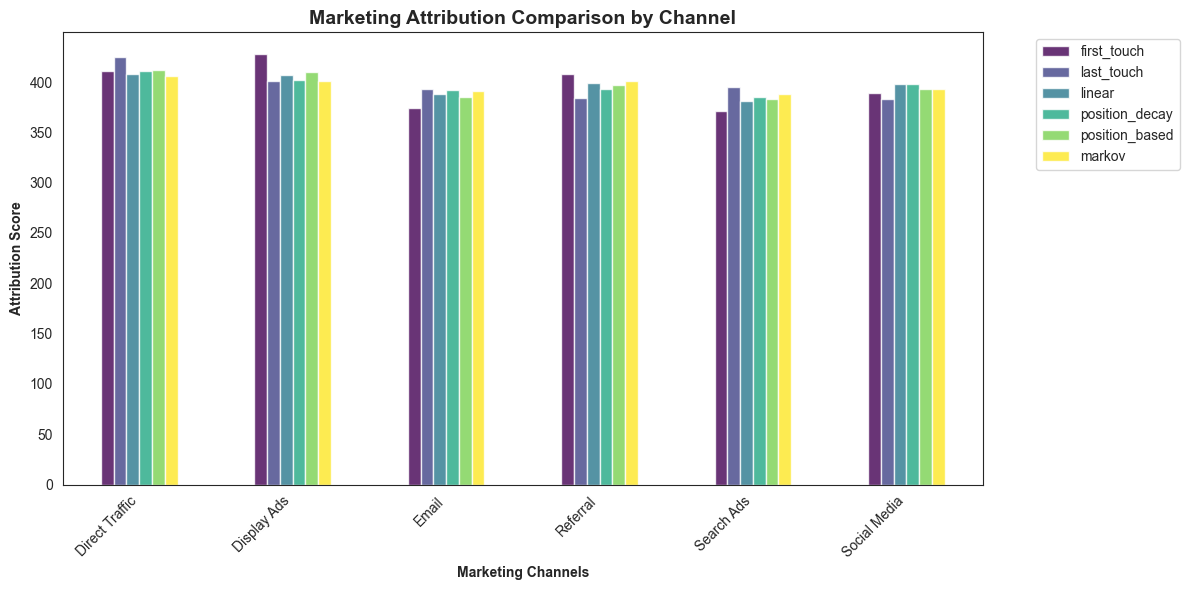

In [16]:
# Einfache Version - nur gruppiertes Balkendiagramm
df_clean.set_index('channel').plot(kind='bar', 
                                   figsize=(12, 6), 
                                   colormap='viridis',
                                   alpha=0.8)
plt.title('Marketing Attribution Comparison by Channel', fontsize=14, fontweight='bold')
plt.xlabel('Marketing Channels', fontweight='bold')
plt.ylabel('Attribution Score', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart shows how many conversions are attributed to each channel considering the different attribution models. It is noticeable that the distribution of conversions is unusually even. The EDA also shows that the distribution of conversions by channel is almost 50:50 everywhere. This is a rather unusual phenomenon. Experience shows that channels take on different functions in the CUstomer Journey and have different conversion strengths.